# Heart Disease Prediction

### Importing necessary libraries

In [1]:
import numpy as np# we are importing pandas and numpy to read data,plt for plotting.
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams# for styling plots
from matplotlib.cm import rainbow# for applying colors
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
#importing from sklearn for implementing machine learning models and processing the data like splitting test and training data.
from sklearn.preprocessing import StandardScaler

### Importing all the Machine Learning algorithms.

1. K Neighbors Classifier 

2. Support Vector Classifier

3. Decision Tree Classifier

4. Logical Regression

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Read Dataset

In [4]:
df=pd.read_csv(r"C:\Users\pavan\Downloads\Machine Learning Datasets\Machine Learning Datasets\Heart Disease\heart.csv")
#reading csv file using path of file and read_csv() function.
type(df)

pandas.core.frame.DataFrame

In [5]:
df

,70,1,4,130,322,0,2,109,0.1,2.4,2.1,3,3.1,2.2
0,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
2,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
3,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
4,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
265,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
266,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
267,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [6]:
df.head()

,70,1,4,130,322,0,2,109,0.1,2.4,2.1,3,3.1,2.2
0,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
2,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
3,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
4,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1


Next I am adding headings to my datasets,so it will be easy to split data for trainig and testing and visualization.

In [7]:
# adding header
header_names = ['age','sex   0:female,1:male','chest pain type','resting blood pressure','serum cholestoral in mg/dl','fasting blood sugar > 120 mg/dl','resting electrocardiographic results','maximum heart rate achieved','exercise induced angina','oldpeak = ST depression induced by exercise relative to rest','the slope of the peak exercise ST segment','number of major vessels (0-3) colored by flourosopy','thal: 3 = normal; 6 = fixed defect; 7 = reversable defect','Absence (1) or presence (2) of heart disease']
df=pd.read_csv(r"C:\Users\pavan\Downloads\Machine Learning Datasets\Machine Learning Datasets\Heart Disease\heart.csv",header=None,skiprows=1,names=header_names)

In [8]:
df

,age,"sex 0:female,1:male",chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak = ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment,number of major vessels (0-3) colored by flourosopy,thal: 3 = normal; 6 = fixed defect; 7 = reversable defect,Absence (1) or presence (2) of heart disease
0,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
2,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
3,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
4,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
265,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
266,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
267,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


Using the desribe() and info() methods we can see the dataset loaded with variables, Now the dataset is ready to start processing and visualizing.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 14 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   age                                                           269 non-null    int64  
 1   sex   0:female,1:male                                         269 non-null    int64  
 2   chest pain type                                               269 non-null    int64  
 3   resting blood pressure                                        269 non-null    int64  
 4   serum cholestoral in mg/dl                                    269 non-null    int64  
 5   fasting blood sugar > 120 mg/dl                               269 non-null    int64  
 6   resting electrocardiographic results                          269 non-null    int64  
 7   maximum heart rate achieved                                   269 non-n

In [10]:
df.describe()

,age,"sex 0:female,1:male",chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak = ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment,number of major vessels (0-3) colored by flourosopy,thal: 3 = normal; 6 = fixed defect; 7 = reversable defect,Absence (1) or presence (2) of heart disease
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,54.375465,0.676580,3.171004,131.349442,249.390335,0.148699,1.018587,149.828996,0.330855,1.044981,1.583643,0.661710,4.702602,1.442379
std,9.076186,0.468653,0.950518,17.894712,51.592983,0.356455,0.997959,23.075002,0.471398,1.144366,0.615011,0.934847,1.941503,0.497595
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,2.000000


Now we are minimizing the names of the headings to understand easily.

In [11]:
header_names = ['age','sex','chest pain','rest bp','serum chol','sugar','elcardgraph','heartrate','angina','oldpeak','slope','flourosopy','thal','Absence (1) or presence (2) of heart disease']
df=pd.read_csv(r"C:\Users\pavan\Downloads\Machine Learning Datasets\Machine Learning Datasets\Heart Disease\heart.csv",header=None,skiprows=1,names=header_names)

In [12]:
df

,age,sex,chest pain,rest bp,serum chol,sugar,elcardgraph,heartrate,angina,oldpeak,slope,flourosopy,thal,Absence (1) or presence (2) of heart disease
0,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
2,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
3,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
4,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
265,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
266,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
267,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


### Understanding the data

use visualizations to better understand the data and then look at any processing you might want to do.

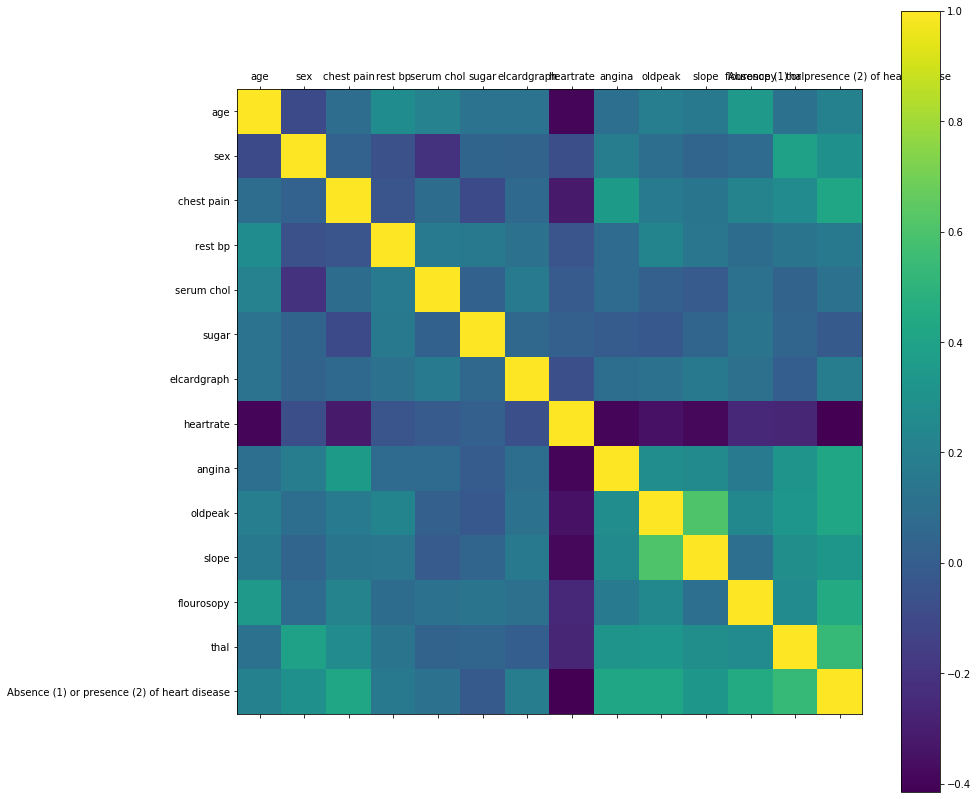

In [13]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

Next, we'll take a look at the histograms for each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000263EE680408>,
      dtype=object)

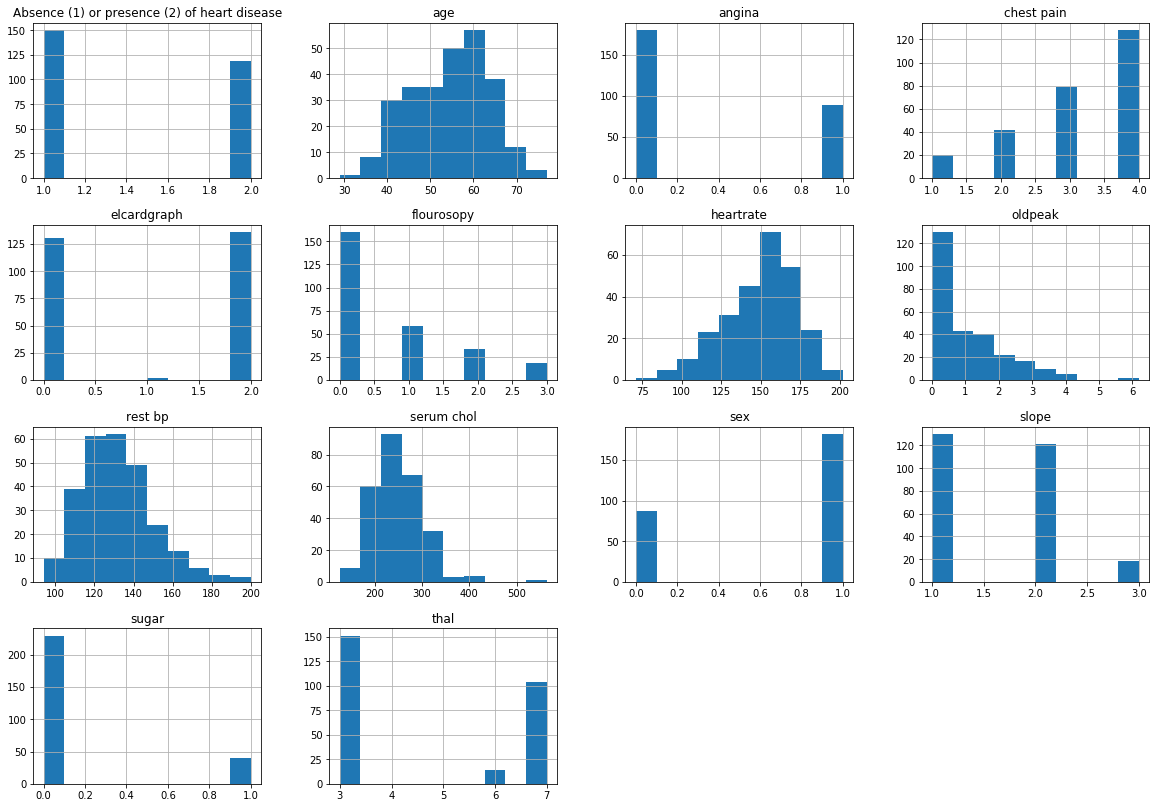

In [14]:
df.hist()

## Exploratory Data Analysis

### Check for Missing Data

import the seaborn library to check for any missing data by performing the exploratory data analysis.

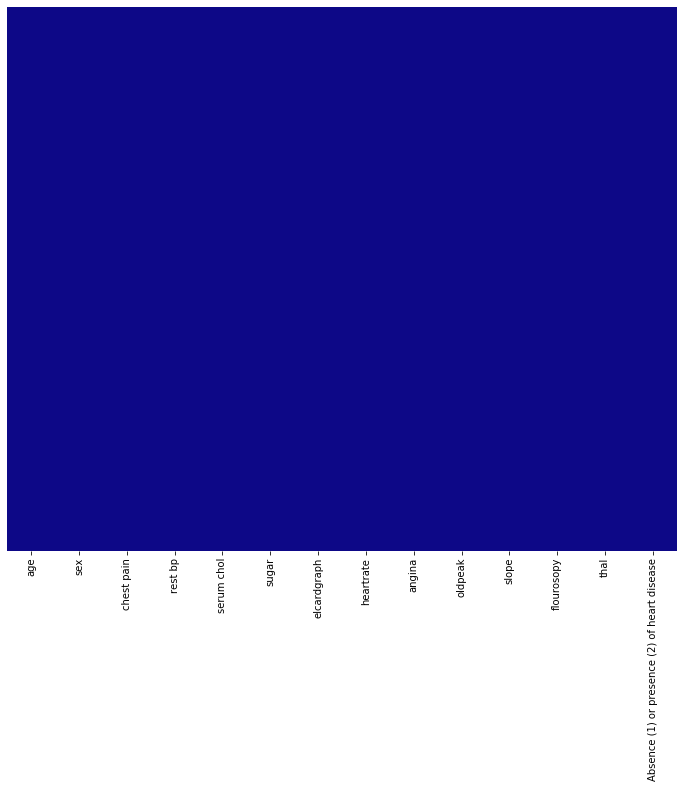

In [15]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')   # creating heatmap for visual analysis

In the heatmap created above, we can see that there are no missing values present.

Text(0.5, 1.0, 'Count of each Absence (1) or presence (2) of heart disease Class')

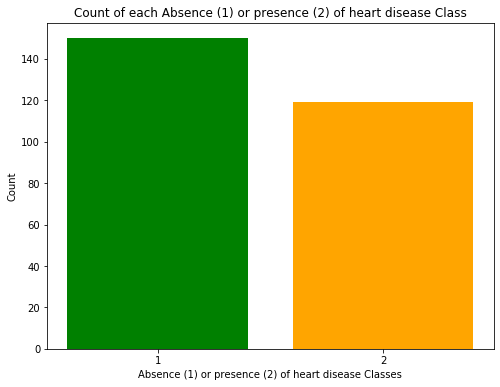

In [16]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['Absence (1) or presence (2) of heart disease'].unique(), df['Absence (1) or presence (2) of heart disease'].value_counts(), color = ['green', 'orange'])
plt.xticks([1, 2])
plt.xlabel('Absence (1) or presence (2) of heart disease Classes')
plt.ylabel('Count')
plt.title('Count of each Absence (1) or presence (2) of heart disease Class')

By counting the two classes of Absence (1) or presence (2) of heart disease are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

## Handle Categorical Values

### Data Processing

In [17]:
df = pd.get_dummies(df, columns = ['sex', 'chest pain', 'sugar', 'elcardgraph', 'angina', 'slope', 'flourosopy', 'thal'])

use the StandardScaler from sklearn to scale the dataset.

In [18]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'rest bp', 'serum chol','oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

The data is ready for the Machine Learning application.

## Split Data for Training and Testing

import the train_test_split to split the dataset into training and testing datasets. Then, import all ML models to train and test the data

In [19]:
y = df['Absence (1) or presence (2) of heart disease']
X = df.drop(['Absence (1) or presence (2) of heart disease'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

#### K Neighbors Classifier

The classification score varies based on the different values of neighbors that we choose. Thus, plot a score graph for different values of K (neighbors) and then check when to achieve the best score.

In [20]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

We have the scores for different neighbor values in the array knn_scores. We'll now plot it and see for which value of K did we get the best scores

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

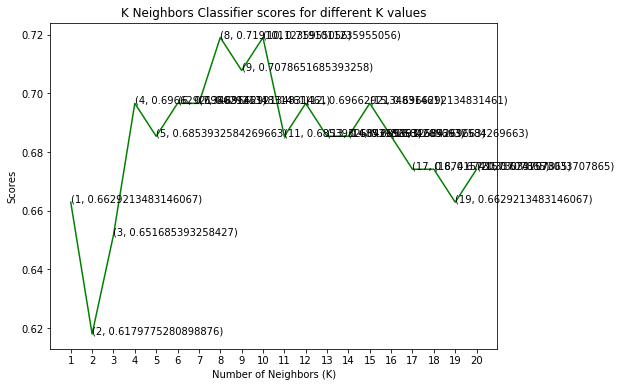

In [21]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'green')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [22]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 71.91011235955057% with 8 nieghbors.


## Apply different Classification Algorithms and tune them

#### Support Vector Classifier

In [23]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

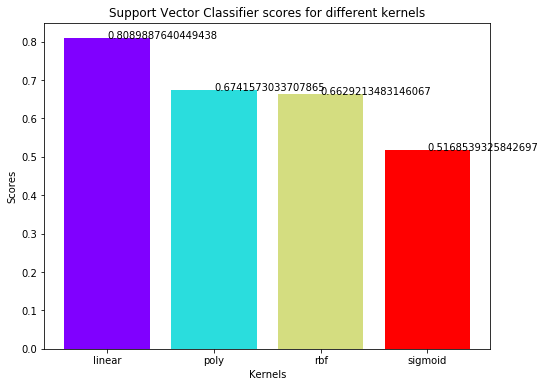

In [24]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [25]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 80.89887640449437% with linear kernel.


#### Decision Tree Classifier

Here, We'll use the Decision Tree Classifier to model the problem. We'll vary between a set of max_features and see which returns the best accuracy.

In [48]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

We selected the maximum number of features from 1 to 30 for split. Now, let's see the scores for each of those cases.

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

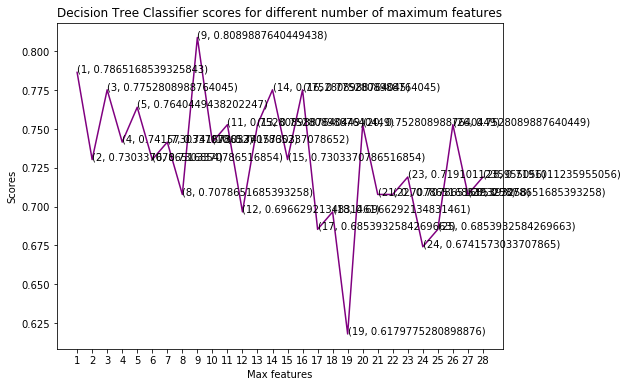

In [49]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'purple')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [28]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))

The score for Decision Tree Classifier is 69.66292134831461% with [2, 4, 18] maximum features.


### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
y = df['Absence (1) or presence (2) of heart disease']
X = df.drop(['Absence (1) or presence (2) of heart disease'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [39]:
logmodel = LogisticRegression(max_iter=800)
#logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions

In [40]:
predictions = logmodel.predict(X_test)

### Evaluation and performance metrics

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
cnf_matrix=confusion_matrix(y_test,predictions)
cnf_matrix

array([[43,  5],
       [10, 31]], dtype=int64)

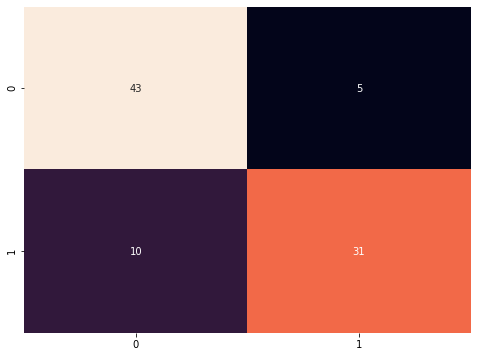

In [43]:
# creating heatmap for confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='g', cbar=False)

In [44]:
# printing classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.81      0.90      0.85        48
           2       0.86      0.76      0.81        41

    accuracy                           0.83        89
   macro avg       0.84      0.83      0.83        89
weighted avg       0.83      0.83      0.83        89



In [45]:
index_num=10   
print(X_test.iloc[index_num])
print("\nActual: (1)Absence or (2)Presence of Heart disease: ",y_test.iloc[index_num])

age                1.393544
rest bp            1.156154
serum chol         0.536141
heartrate        172.000000
oldpeak           -0.914855
sex_0              1.000000
sex_1              0.000000
chest pain_1       0.000000
chest pain_2       0.000000
chest pain_3       1.000000
chest pain_4       0.000000
sugar_0            1.000000
sugar_1            0.000000
elcardgraph_0      1.000000
elcardgraph_1      0.000000
elcardgraph_2      0.000000
angina_0           1.000000
angina_1           0.000000
slope_1            1.000000
slope_2            0.000000
slope_3            0.000000
flourosopy_0       0.000000
flourosopy_1       1.000000
flourosopy_2       0.000000
flourosopy_3       0.000000
thal_3             1.000000
thal_6             0.000000
thal_7             0.000000
Name: 135, dtype: float64

Actual: (1)Absence or (2)Presence of Heart disease:  1


In [46]:
test_sample=X_test.iloc[index_num].to_numpy().reshape(1,-1)
predicted_result = logmodel.predict(test_sample)
print("Prediction Result:",predicted_result)  

Prediction Result: [1]


We have seen that the prediction result and the actual result are same. And from the metric calculation we can say that the logistic regression is 83% accurate.

### Visually compare the performance of all classifiers

We have applied the four ML algorithms:K Neighbors Classifier, Support Vector Classifier, Decision Tree Classifier and Logical Regression to compare the performance of all classifiers.Among the four machine learning algorithms Logical Regression achieved the highest score of 83%. Along with that, the score for Support Vector Classifier is 80.89887640449437% is also the best supporting algorithm. 

### Conclusion for this project

In this project, We have used the Machine Learning to predict whether a person is suffering from a heart disease or not. After importing the data, We analysed it using the plots. Then, We have generated the dummy variables for categorical features and scaled other features. We then applied four Machine Learning algorithms, K Neighbors Classifier, Support Vector Classifier, Decision Tree Classifier and Logical Regression. We can regulate the input training data to improve the algorithms.Here, Logical regression achieved 83% of accuracy.